# Predict House price
## *Comparing 8 regression algorithms*

![house](https://i.imgur.com/HGsQXQS.png)

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

# Table of contents

[<h3>1. Data Analysis & Data Processing</h3>](#1)

[<h3>2. Model comparison</h3>](#2)

[<h3>3. Prediction metrics of the best model using the test set</h3>](#3)

[<h3>4. Visualization of the result</h3>](#4)


# Load the libraries

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from time import perf_counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
from sklearn.decomposition import PCA

from IPython.display import Markdown, display

def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))

import warnings
warnings.filterwarnings(action='ignore')

# 1. Data Analysis & Data Processing<a class="anchor" id="1"></a><a class="anchor" id="1"></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive"

os.chdir(path)
os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['kc_house_data.csv',
 'Colab Notebooks',
 'price prediction.py',
 'house_data.csv',
 'outfile.png',
 'Housing Price Prediction.ipynb']

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/kc_house_data.csv")

In [ ]:
# df = pd.read_csv('../input/housesalesprediction/kc_house_data.csv', index_col = 0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


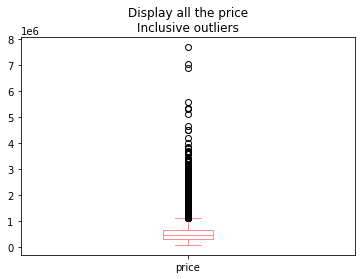

In [ ]:
df['price'].plot.box(by='price', color = '#ff8c8e')
plt.title('Display all the price\nInclusive outliers')
plt.show()

As we can see there are strong outliers. We'll filter them out and keep only the prices lower than 1.000.000.

In [ ]:
# df = df[df['price'] < 1000000]

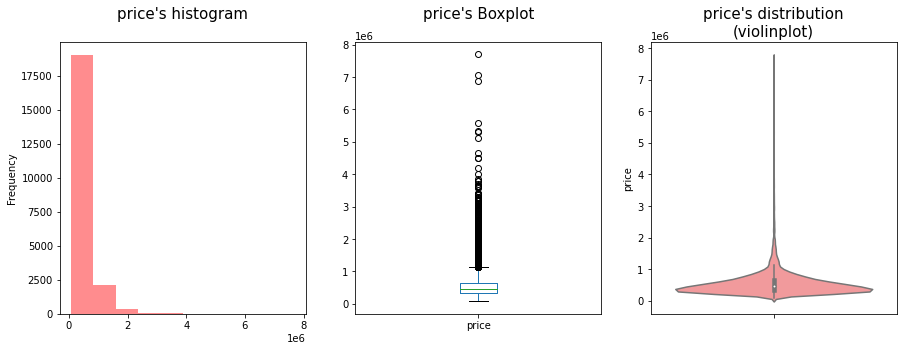

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df['price'].plot.hist(by='price',ax = axes[0], color = '#ff8c8e')
axes[0].set_title('price\'s histogram\n', fontsize = 15)

df['price'].plot.box(ax = axes[1])
axes[1].set_title('price\'s Boxplot\n', fontsize = 15)

sns.violinplot(ax = axes[2], y = 'price', data = df, color = '#ff8c8e')
axes[2].set_title('price\'s distribution\n(violinplot)', fontsize = 15)

plt.show()

In [ ]:
printmd(f'### Number of rows in the dataset: {df.shape[0]}')

### Number of rows in the dataset: 21613

### Add a column to the DataFrame: age
The data are from the year 2014 and 2015. We'll take 2015 to simplify the calculation.The age is whether the number of years since the house was built or if it has been
renovated, the number of years since the renovation.

In [ ]:
# Add the column age
df['age'] = [2015 - x[0] if x[1]==0 else 2015 - x[1] for x in df[['yr_built','yr_renovated']].values]

# Display the result
df[['yr_built','yr_renovated','age']].head()

,yr_built,yr_renovated,age
0,1955,0,60
1,1951,1991,24
2,1933,0,82
3,1965,0,50
4,1987,0,28


In [ ]:
# Select some columns, which will be used in the regression model
cols =['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',
     'waterfront','view','condition','grade','sqft_above','sqft_basement',
     'yr_built','yr_renovated','lat','long','sqft_living15',
     'sqft_lot15','age']
df = df[cols]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,60
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,24
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,50
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,28


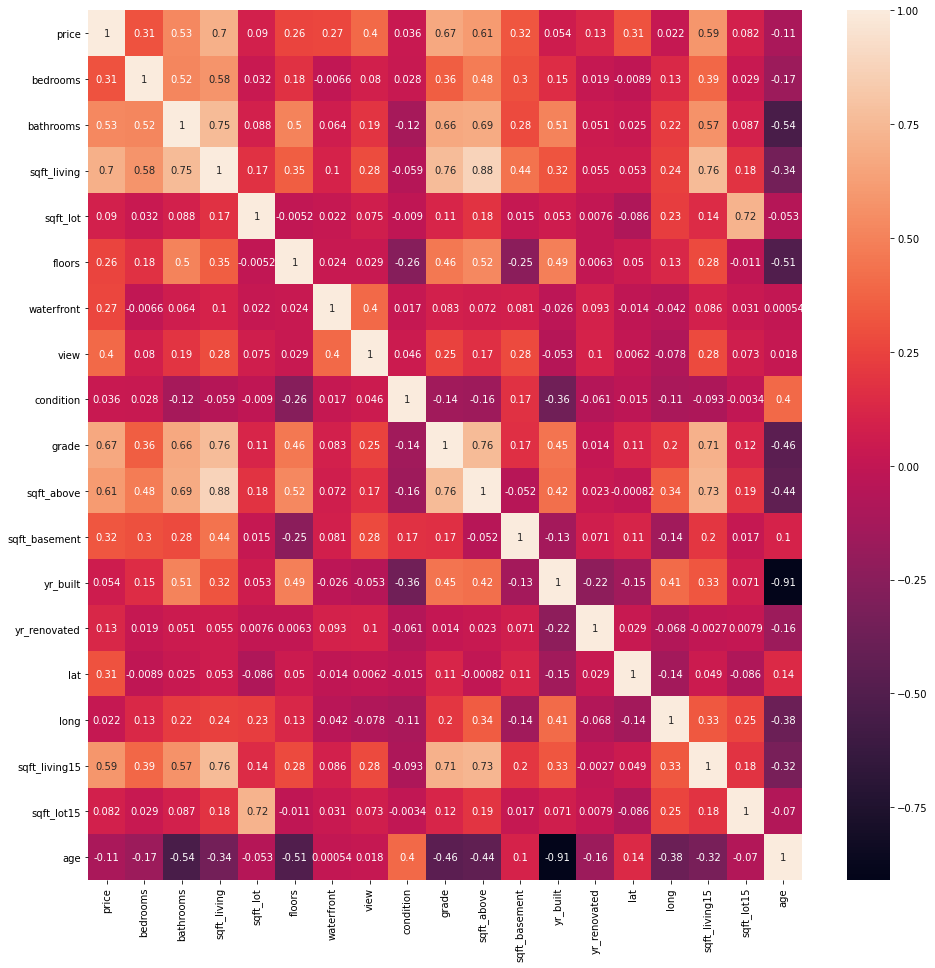

In [ ]:
corrs = df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corrs,annot = True)

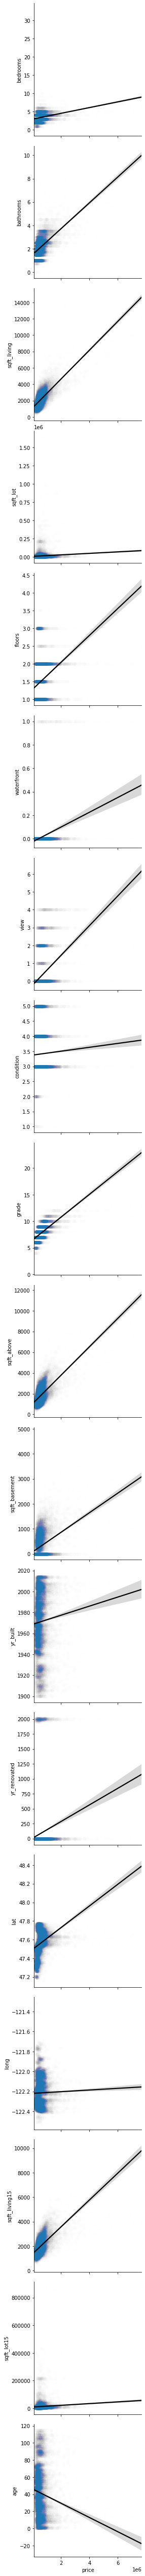

In [ ]:
# Visualization
sns.pairplot(df[cols], 
             kind='reg', 
             plot_kws={'line_kws':{'color':'black'}, 'scatter_kws': {'alpha': 0.005}},
             x_vars=['price'],
             y_vars=cols[1:],
             height = 4
            )
plt.show()

In [ ]:
df.corr()['price'].sort_values(ascending = False)  #重点关注sqft_livin

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
age             -0.105755
Name: price, dtype: float64

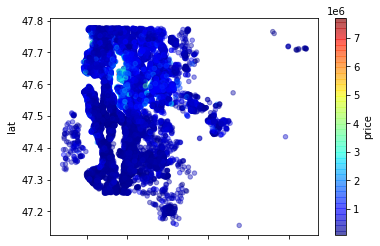

In [ ]:
# 异常值处理之前
df.plot(kind='scatter', x='long', y='lat', alpha=0.4,
        c="price", cmap=plt.get_cmap("jet"), colorbar=True)

In [ ]:
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

Delete number is: 420
Now column number is: 21193
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: price, dtype: float64
Description of data larger than the upper bound is:
count    4.200000e+02
mean     2.254861e+06
std      7.645877e+05
min      1.615000e+06
25%      1.761500e+06
50%      1.988250e+06
75%      2.476000e+06
max      7.700000e+06
Name: price, dtype: float64
Delete number is: 20
Now column number is: 21173
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: bedrooms, dtype: float64
Description of data larger than the upper bound is:
count    20.000000
mean     10.000000
std       5.486826
min       8.000000
25%       8.000000
50%       9.000000
75%       9.250000
max      33.000000
Name: bedrooms, dtype: float64
Delete number is: 5
Now column number is: 2

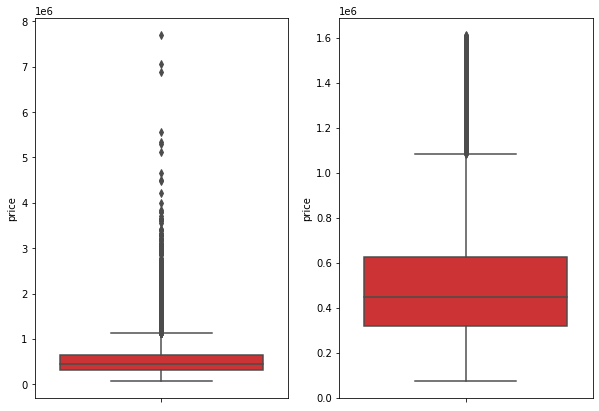

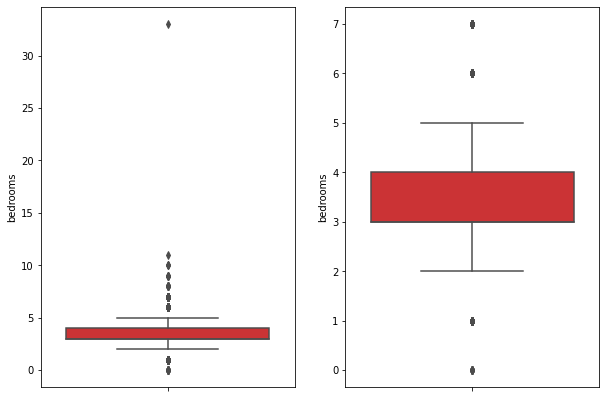

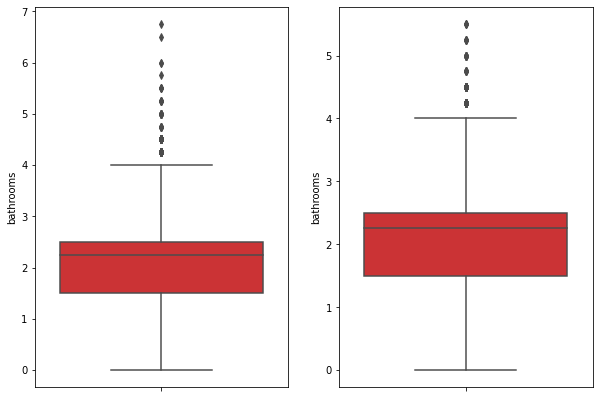

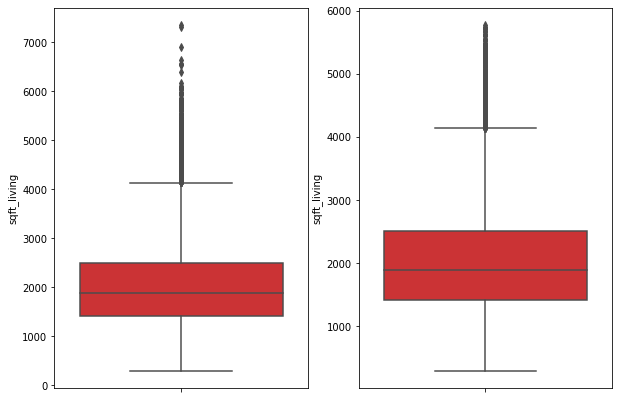

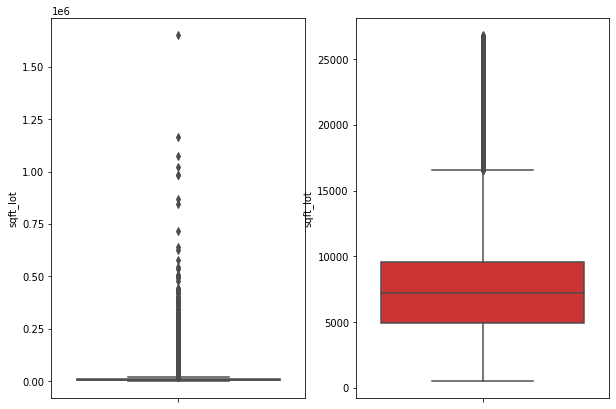

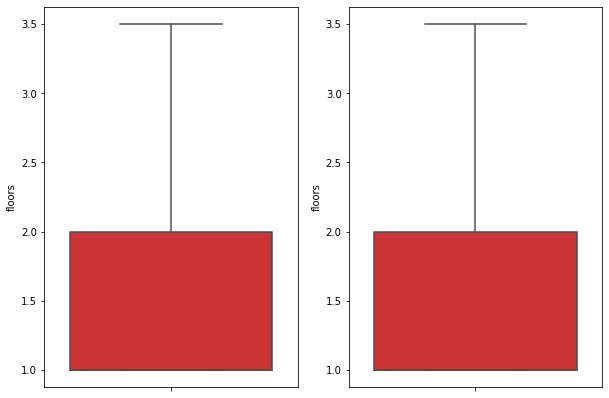

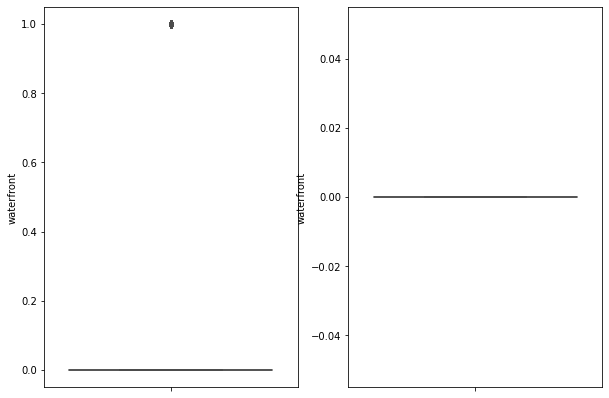

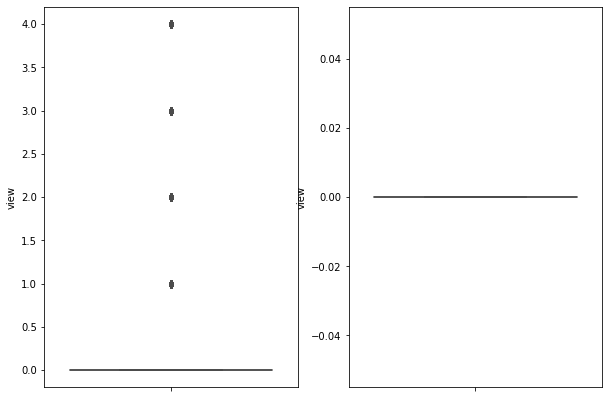

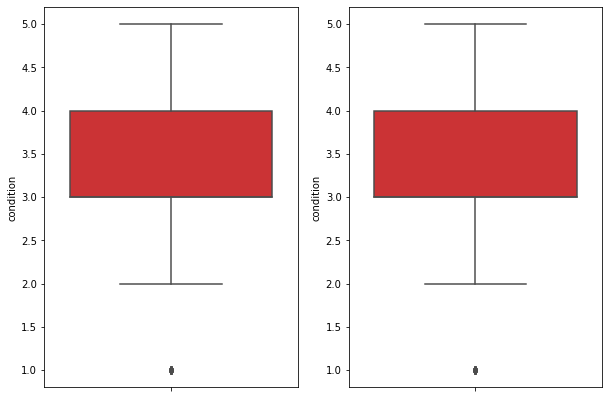

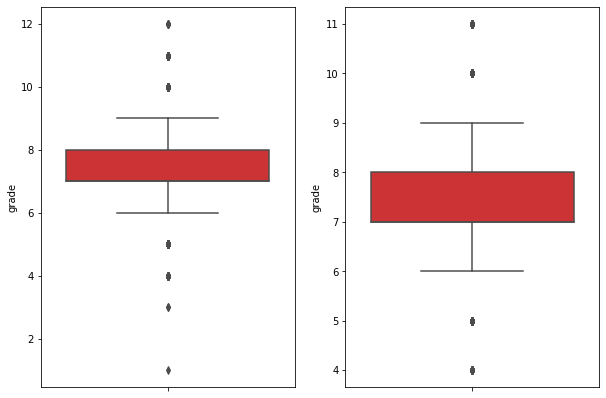

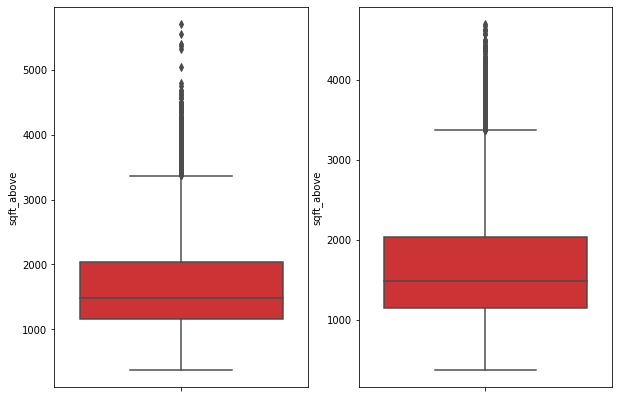

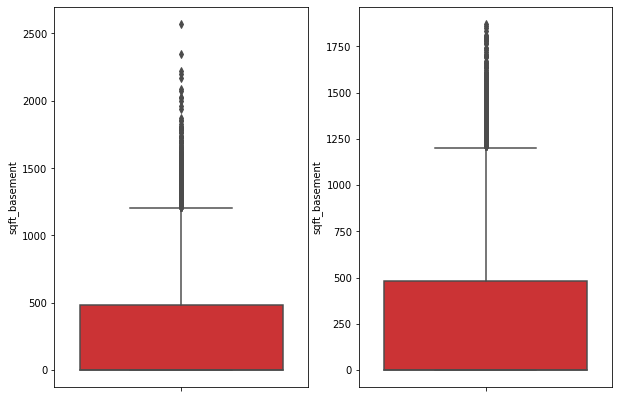

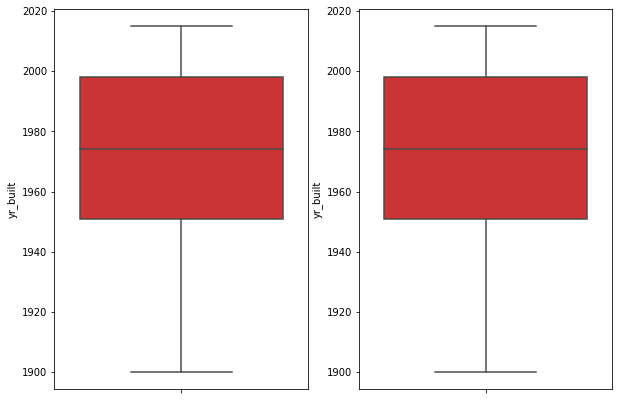

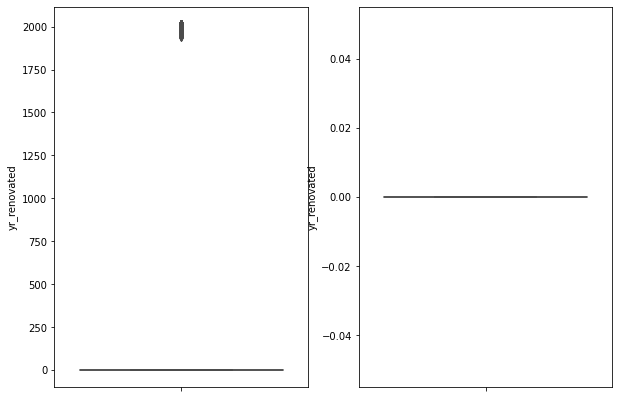

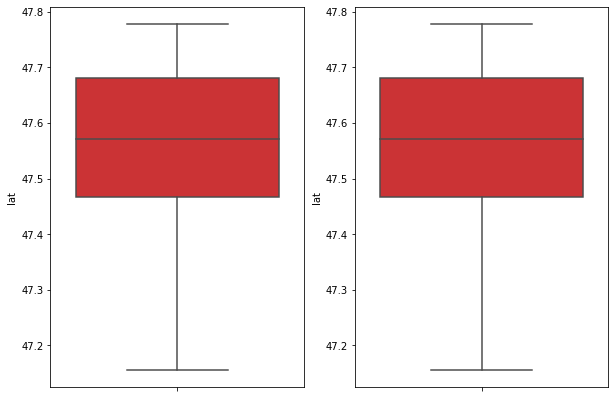

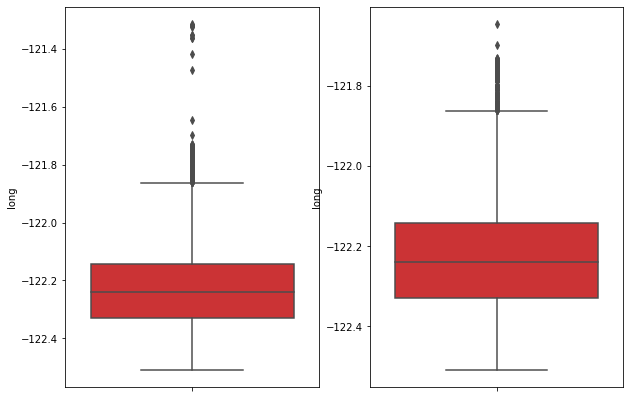

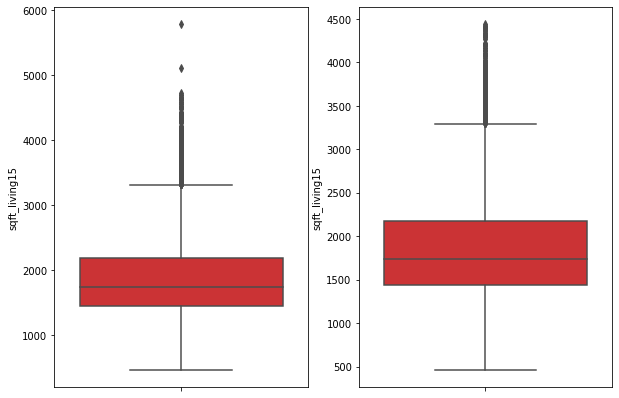

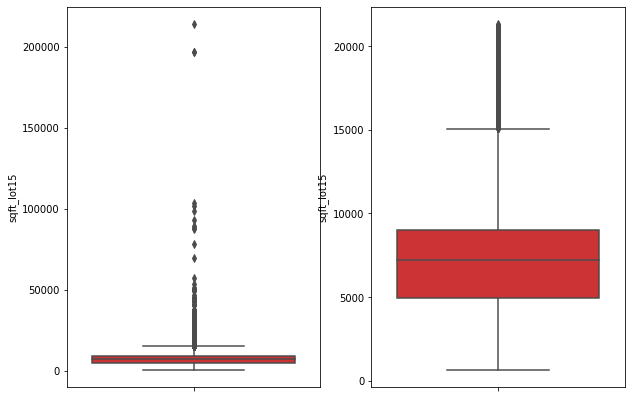

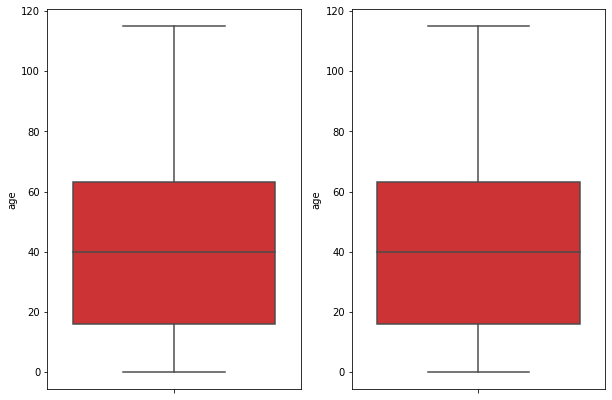

In [ ]:
for i in df.columns.values.tolist():
    if str(df[i]) != 'int64':
        df[i] = df[i].apply(pd.to_numeric)
        df = outliers_proc(df,i)
    else:
        df = outliers_proc(df,i)

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16891 entries, 0 to 16890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16891 non-null  float64
 1   bedrooms       16891 non-null  int64  
 2   bathrooms      16891 non-null  float64
 3   sqft_living    16891 non-null  int64  
 4   sqft_lot       16891 non-null  int64  
 5   floors         16891 non-null  float64
 6   waterfront     16891 non-null  int64  
 7   view           16891 non-null  int64  
 8   condition      16891 non-null  int64  
 9   grade          16891 non-null  int64  
 10  sqft_above     16891 non-null  int64  
 11  sqft_basement  16891 non-null  int64  
 12  yr_built       16891 non-null  int64  
 13  yr_renovated   16891 non-null  int64  
 14  lat            16891 non-null  float64
 15  long           16891 non-null  float64
 16  sqft_living15  16891 non-null  int64  
 17  sqft_lot15     16891 non-null  int64  
 18  age   

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age
count,1.689100e+04,16891.00000,16891.000000,16891.000000,16891.000000,16891.00000,16891.0,16891.0,16891.000000,16891.000000,16891.000000,16891.000000,16891.000000,16891.0,16891.000000,16891.000000,16891.000000,16891.000000,16891.000000
mean,4.653516e+05,3.31058,2.021816,1900.519093,7421.708661,1.48437,0.0,0.0,3.410159,7.472559,1660.545320,239.973773,1971.976911,0.0,47.559769,-122.222258,1858.297733,7200.688118,43.023089
std,2.246777e+05,0.86675,0.700824,727.001614,3918.250626,0.54555,0.0,0.0,0.651383,1.001303,698.150914,376.668462,29.493632,0.0,0.139402,0.131088,584.232602,3349.243603,29.493632
min,7.800000e+04,0.00000,0.000000,370.000000,520.000000,1.00000,0.0,0.0,1.000000,4.000000,370.000000,0.000000,1900.000000,0.0,47.155900,-122.490000,460.000000,651.000000,0.000000
25%,3.030000e+05,3.00000,1.500000,1360.000000,4815.500000,1.00000,0.0,0.0,3.000000,7.000000,1150.000000,0.000000,1952.000000,0.0,47.468300,-122.330000,1440.000000,4950.000000,16.000000
50%,4.180000e+05,3.00000,2.000000,1790.000000,7200.000000,1.00000,0.0,0.0,3.000000,7.000000,1470.000000,0.000000,1975.000000,0.0,47.570600,-122.244000,1740.000000,7241.000000,40.000000
75%,5.737500e+05,4.00000,2.500000,2330.000000,9332.000000,2.00000,0.0,0.0,4.000000,8.000000,2030.000000,460.000000,1999.000000,0.0,47.681000,-122.145000,2180.000000,8993.500000,63.000000
max,1.610000e+06,7.00000,5.250000,5720.000000,26772.000000,3.50000,0.0,0.0,5.000000,11.000000,4670.000000,1870.000000,2015.000000,0.0,47.777600,-121.646000,4440.000000,21315.000000,115.000000


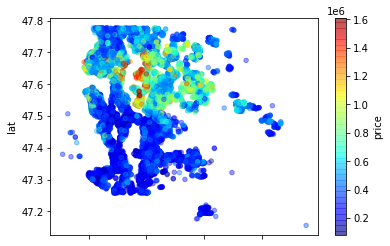

In [ ]:
# 异常值处理之后
df.plot(kind='scatter', x='long', y='lat', alpha=0.4,
        c="price", cmap=plt.get_cmap("jet"), colorbar=True)

In [ ]:
def preprocessing(df):
    df = df.copy()
       
    # Shuffle the data
    # df = df.sample(frac=1.0, random_state=0).reset_index(drop=True)
    
    X = df.drop('price', axis=1)
    y = df['price']
    
    X = pd.DataFrame(X, index=X.index, columns=X.columns)
    
    return X, y

# Preprocessing
X,y = preprocessing(df)

# Split into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the datasets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the result
print(X_train)
print(X_train.shape)

# PCA
pca = PCA(n_components=0.98)
pca.fit(X_train,y_train)
X_train_dunction = pca.transform(X_train)
# X_test_dunction = pca.transform(X_test)

print(X_train_dunction)
print(X_train_dunction.shape)

[[ 3.11722951  1.39511783  1.36354481 ...  0.55193697 -1.41094618
   2.24457871]
 [-0.35372271 -0.03073412 -0.45254135 ... -0.4913387  -0.58121666
  -0.87803731]
 [ 0.80326137  0.32572887  0.42798527 ...  0.80848016  0.48702293
  -0.43679809]
 ...
 [-1.51070678 -1.45658607 -1.27803506 ... -0.98732221 -0.28382256
   1.05662696]
 [-0.35372271  0.32572887  0.41422705 ...  0.58614273  0.83200008
  -0.53862253]
 [ 0.80326137  1.39511783  0.85449036 ...  1.116332   -0.65110427
  -1.01380323]]
(13512, 18)
[[ 0.8473161   0.25148068  4.10127769 ...  0.01446869 -0.28606694
  -0.8130026 ]
 [-0.16556983 -1.22107142 -1.5364141  ...  0.26960736  0.64587488
   0.31340019]
 [ 2.39334082  0.01757007 -0.31231634 ... -0.87912246 -0.16807212
  -0.49553773]
 ...
 [-3.42243707  0.10029149 -1.34500917 ...  0.27414043  0.08960378
   0.29009458]
 [ 1.64934137 -0.17265399 -1.54252769 ... -0.07224204 -0.18580758
  -0.11831709]
 [ 3.07490742 -1.07367205 -0.65845645 ...  0.75197992  0.08183605
  -0.06765873]]
(135

Skewness of target: 1.4580276358237536
kurtosis of target: 3.134392420868059


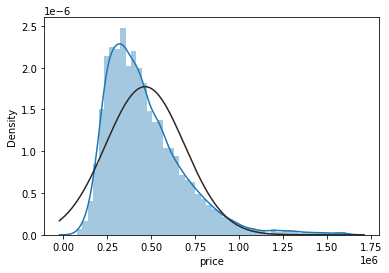

In [ ]:
#因为由前文可知，目标值明显右偏，故取对数，使其近似正态分布

sns.distplot(y_train, fit=norm)
print('Skewness of target:', y_train.skew())
print('kurtosis of target:', y_train.kurtosis())

Skewness of target: 0.060506723972483224
kurtosis of target: -0.06685752626258168


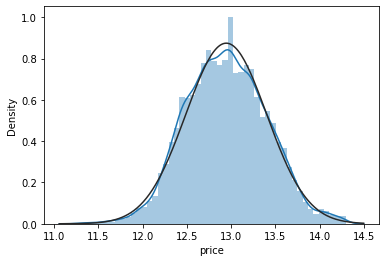

In [ ]:
y_train = np.log1p(y_train)
print('Skewness of target:', y_train.skew())
print('kurtosis of target:', y_train.kurtosis())
sns.distplot(y_train, fit=norm)

# 2. Model comparison<a class="anchor" id="2"></a>

In [ ]:
models = {
    "LinearRegression":{"model":LinearRegression() },
    "Lasso":{"model":Lasso() },
    # "Ridge":{"model":Ridge() },
    # "DecisionTreeRegressor":{"model":DecisionTreeRegressor() },
    "RandomForestRegressor":{"model":RandomForestRegressor() },
    # "MLPRegressor":{"model":MLPRegressor() },
    "GradientBoostingRegressor":{"model":GradientBoostingRegressor() },
    # "AdaBoostRegressor":{"model":AdaBoostRegressor() }
}

# Use the K-fold cross validation for each model
# to get the mean validation accuracy and the mean training time
k = 5
for name, m in models.items():
    # Cross validation of the model
    model = m['model']
    result = cross_validate(model, X_train,y_train, cv = k, scoring='neg_mean_squared_error')
    
    # Mean accuracy and mean training time
    result['test_score'] = result['test_score']
    mean_RMSE = [(-x)**0.5 for x in result['test_score']] # Root Mean Square Error
    mean_RMSE = sum(mean_RMSE)/len(mean_RMSE)
    # mean_RMSE = int(mean_RMSE)
    mean_fit_time = round( sum(result['fit_time']) / len(result['fit_time']), 4)
    
    # Add the result to the dictionary witht he models
    m['mean_RMSE'] = mean_RMSE
    m['Training time (sec)'] = mean_fit_time
    
    # Display the result
    print(f"{name:27} mean MSRE for {k}-fold CV: {mean_RMSE} - mean training time {mean_fit_time} sec")

LinearRegression            mean MSRE for 5-fold CV: 0.23942369536645294 - mean training time 0.012 sec
Lasso                       mean MSRE for 5-fold CV: 0.45622127778024535 - mean training time 0.008 sec
RandomForestRegressor       mean MSRE for 5-fold CV: 0.16527124663484377 - mean training time 9.1563 sec
GradientBoostingRegressor   mean MSRE for 5-fold CV: 0.17171736470290414 - mean training time 2.797 sec


In [ ]:
# WithPCA
k = 5
for name, m in models.items():
    # Cross validation of the model
    model = m['model']
    result_pca = cross_validate(model, X_train_dunction,y_train, cv = k, scoring='neg_mean_squared_error')
    
    # Mean accuracy and mean training time
    result_pca['test_score'] = result_pca['test_score']
    mean_RMSE_pca = [(-x)**0.5 for x in result_pca['test_score']] # Root Mean Square Error
    mean_RMSE_pca = sum(mean_RMSE_pca)/len(mean_RMSE_pca)
    # mean_RMSE = int(mean_RMSE)
    mean_fit_time_pca = round( sum(result_pca['fit_time']) / len(result_pca['fit_time']), 4)
    
    # Add the result to the dictionary witht he models
    m['mean_RMSE_pca'] = mean_RMSE_pca
    m['Training time with pca (sec)'] = mean_fit_time_pca
    
    # Display the result
    print(f"{name:27} mean MSRE for {k}-fold CV with pca: {mean_RMSE_pca} - mean training time with pca{mean_fit_time_pca} sec")

LinearRegression            mean MSRE for 5-fold CV with pca: 0.23955243114292374 - mean training time with pca0.0119 sec
Lasso                       mean MSRE for 5-fold CV with pca: 0.45622127778024535 - mean training time with pca0.0075 sec
RandomForestRegressor       mean MSRE for 5-fold CV with pca: 0.20370657106232523 - mean training time with pca11.7974 sec
GradientBoostingRegressor   mean MSRE for 5-fold CV with pca: 0.22416281781367609 - mean training time with pca5.0679 sec


In [ ]:
# Create a DataFrame with the results
models_result = []

for name, v in models.items():
    lst = [name, v['mean_RMSE'],v['mean_RMSE_pca'],v['Training time (sec)'],v['Training time with pca (sec)']]
    models_result.append(lst)

df_results = pd.DataFrame(models_result, 
                          columns = ['model','RMSE','RMSE_pca','Training time (sec)','Training time with pca (sec)'])
df_results.sort_values(by='RMSE', ascending=True, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

,model,RMSE,RMSE_pca,Training time (sec),Training time with pca (sec)
0,RandomForestRegressor,0.165271,0.203707,9.1563,11.7974
1,GradientBoostingRegressor,0.171717,0.224163,2.7970,5.0679
2,LinearRegression,0.239424,0.239552,0.0120,0.0119
3,Lasso,0.456221,0.456221,0.0080,0.0075


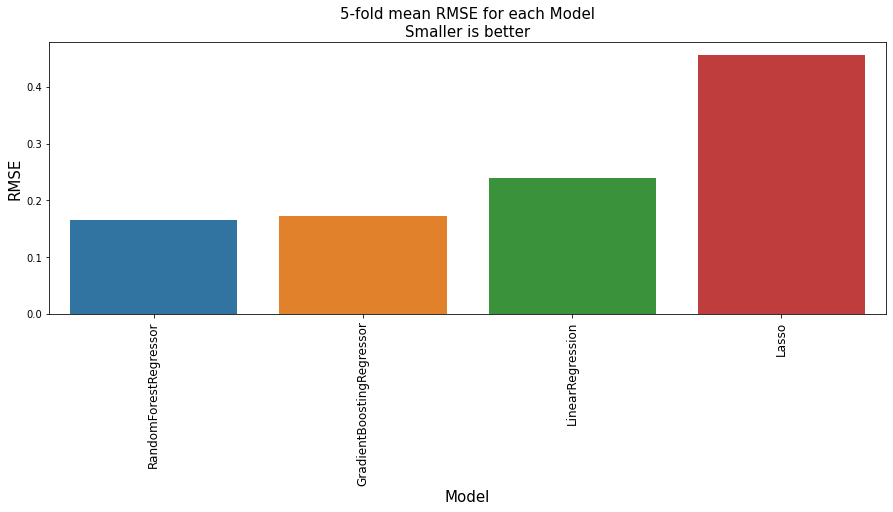

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'model', y = 'RMSE', data = df_results)
plt.title(f'{k}-fold mean RMSE for each Model\nSmaller is better', fontsize = 15)
# plt.ylim(0.8,1.005)
plt.xlabel('Model', fontsize=15)
plt.ylabel('RMSE',fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.show()

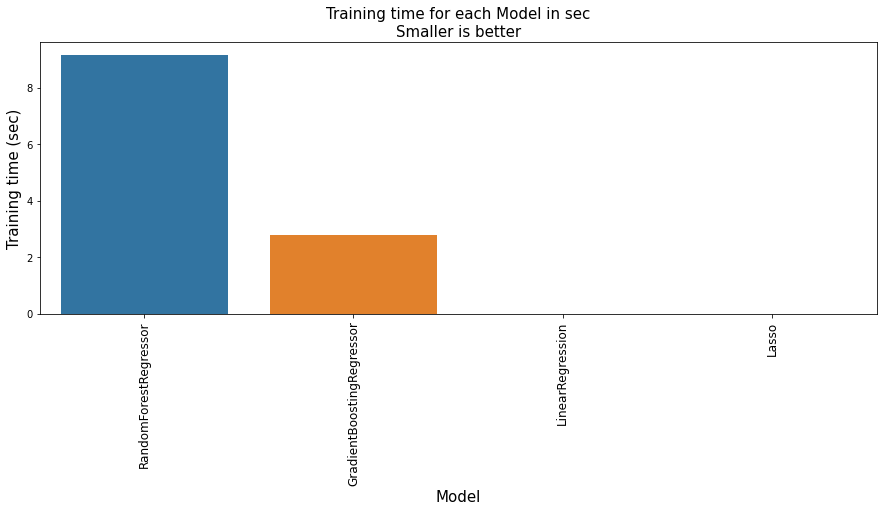

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'model', y = 'Training time (sec)', data = df_results)
plt.title('Training time for each Model in sec\nSmaller is better', fontsize = 15)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Training time (sec)',fontsize=15)
plt.show()

# 3. Prediction metrics of the best model using the test set<a class="anchor" id="3"></a>

In [ ]:
# Get the model with the highest mean validation accuracy
best_model = df_results.iloc[0]

# Fit the model
model = models[best_model[0]]['model']
model.fit(X_train,y_train)

# Predict the labels with the data set
pred = model.predict(X_test)

RMSE = mean_squared_error(y_test,pred)**0.5
RMSE = RMSE

# Display the results
printmd(f'### Best Model: {best_model[0]} with a RMSE of {RMSE} on the test set')
printmd(f'### Trained in: {best_model[2]} sec')

### Best Model: RandomForestRegressor with a RMSE of 517463.4167045944 on the test set

### Trained in: 0.20370657106232523 sec

In [ ]:
print(X_test)
print(X_test.shape)

# PCA
pca_test = PCA(n_components=0.98)
pca_test.fit(X_test,y_test)
X_test_dunction = pca_test.transform(X_test)
# X_test_dunction = pca.transform(X_test)

print(X_test_dunction)
print(X_test_dunction.shape)

[[-1.51070678 -1.45658607 -1.40185911 ... -1.09507035  1.72358758
   0.71721218]
 [-0.35372271  0.68219186  1.48736887 ...  1.92016735  2.44863438
  -0.67438844]
 [-0.35372271 -0.3871971  -0.93407935 ... -0.38872142  0.83348705
   0.24203148]
 ...
 [-0.35372271 -0.03073412  0.33167767 ... -0.6623675  -0.67846453
   1.49786618]
 [ 0.80326137 -0.3871971  -0.28744261 ... -0.86760205 -0.35817109
   0.51356331]
 [-0.35372271 -0.03073412 -0.03979449 ... -0.37161854 -0.30642451
   1.53180766]]
(3379, 18)
[[-3.47903441  1.63724793 -3.31500534 ...  0.54189007 -0.65329675
   0.14532381]
 [ 4.21475108  1.97825176 -2.15256641 ... -0.80612287  0.12945428
  -0.09616943]
 [-1.32278764  0.25192369 -0.85279928 ...  0.32563276  0.50815678
  -0.234346  ]
 ...
 [-1.89966173  1.19076477  2.71638372 ... -0.70195559  0.43357198
   0.3410725 ]
 [-0.98988757 -0.19916923 -0.17843075 ... -0.02993706  0.67919259
   0.49840443]
 [-2.24765045  1.62053516  2.22740917 ... -0.06707808 -0.38094104
  -0.21685821]]
(3379

In [ ]:
# WithPCA
# Get the model with the highest mean validation accuracy
best_model = df_results.iloc[0]

# Fit the model
model_pca = models[best_model[0]]['model']
model_pca.fit(X_train_dunction,y_train)

# Predict the labels with the data set
pred_pca = model_pca.predict(X_test_dunction)

RMSE_pca = mean_squared_error(y_test,pred)**0.5
RMSE_pca = RMSE_pca

# Display the results
printmd(f'### Best Model: {best_model[0]} with a RMSE_pca of {RMSE_pca} on the test set')
printmd(f'### Trained in: {best_model[2]} sec')

### Best Model: RandomForestRegressor with a RMSE_pca of 517463.4167045944 on the test set

### Trained in: 0.20370657106232523 sec

# 4. Visualization of the result<a class="anchor" id="4"></a>

In [ ]:
# Concatenate the ratings of the test set
# with the predictions of those ratings
pred_s = pd.Series(pred)
y_test_s = y_test.reset_index(drop=True)

df_result = pd.concat([y_test_s,pred_s], axis = 1)
df_result.columns = ['Real Rating', 'Predicted Rating']
df_result.head(10)

,Real Rating,Predicted Rating
0,292500.0,12.036874
1,725000.0,13.528948
2,333500.0,12.717887
3,435000.0,13.116892
4,186000.0,12.347043
5,229000.0,12.927442
6,645000.0,13.367702
7,880000.0,13.632598
8,350000.0,12.852733
9,256950.0,12.450846


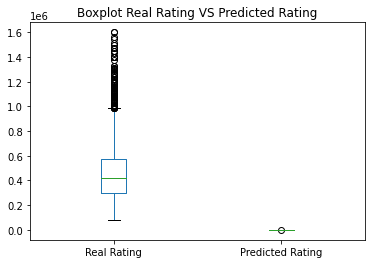

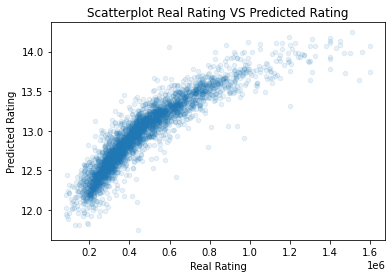

In [ ]:
df_result.plot.box()
plt.title('Boxplot Real Rating VS Predicted Rating', fontsize = 12)
plt.show()

df_result.plot.scatter(x='Real Rating', y='Predicted Rating', alpha = 0.1)
plt.title('Scatterplot Real Rating VS Predicted Rating', fontsize = 12)
plt.show()